# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

ANSWER: The advantage of showing this in an area plot is you can directly compare the levels of nitrate and phosphate to each other and compare their relative contributions. The disadvantage is that when they are stacked on top of each other, it is harder to read their individual values, espesially whichever is on top. The shaded area can also exaggerate small differences in levels. 

I would add titles, and maybe add points to each value with a line going through them. I would also add more y-axis label points. 


In [3]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_1949/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

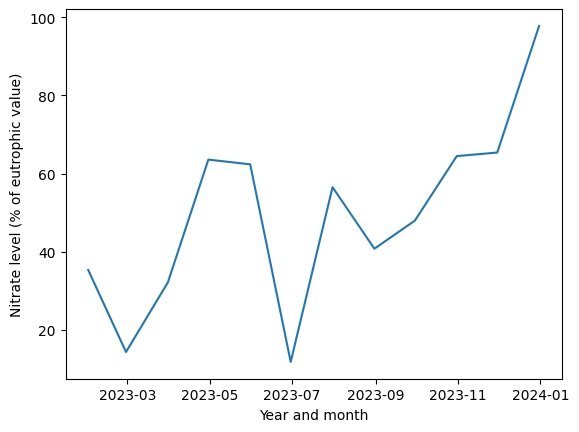

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

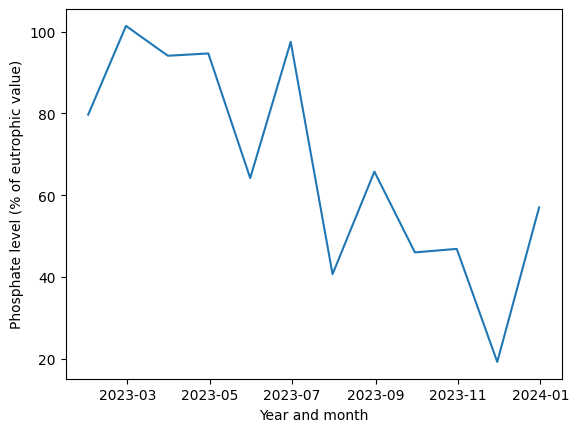

In [5]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

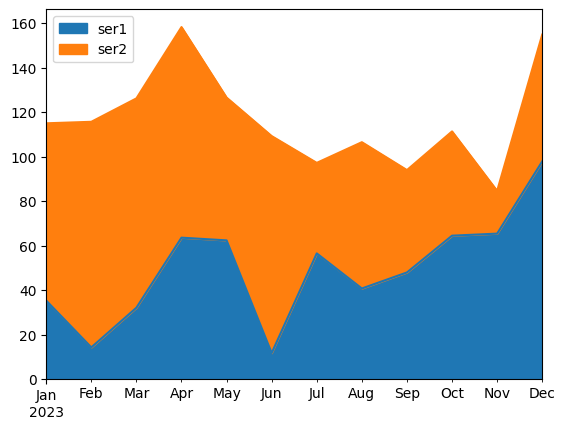

In [6]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [4]:
#1
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

#2
df_heart = pd.read_csv("heart_disease.csv")

#3
df_cc = pd.read_csv("colorectal_cancer_dataset.csv")

DATASET 1: Diabetes Health Indicators

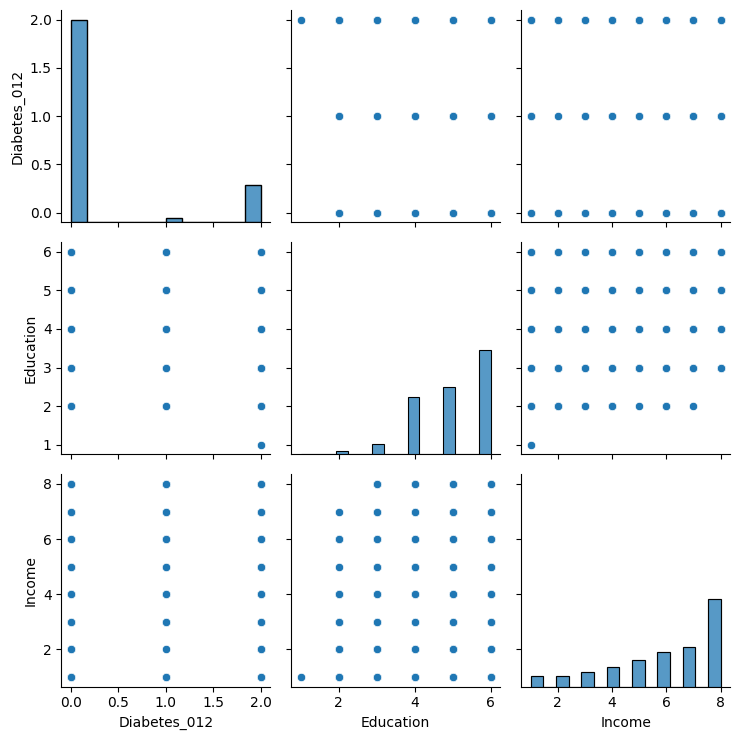

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

df_sample_a = df.sample(n=2000, random_state=1)

correlation_columns = ['Diabetes_012', 'Education', 'Income']

sns.pairplot(df_sample_a[correlation_columns])
plt.tight_layout()
plt.show()

In [6]:
correlation_matrix = df.corr()
print(correlation_matrix)

                      Diabetes_012    HighBP  HighChol  CholCheck       BMI  \
Diabetes_012              1.000000  0.271596  0.209085   0.067546  0.224379   
HighBP                    0.271596  1.000000  0.298199   0.098508  0.213748   
HighChol                  0.209085  0.298199  1.000000   0.085642  0.106722   
CholCheck                 0.067546  0.098508  0.085642   1.000000  0.034495   
BMI                       0.224379  0.213748  0.106722   0.034495  1.000000   
Smoker                    0.062914  0.096991  0.091299  -0.009929  0.013804   
Stroke                    0.107179  0.129575  0.092620   0.024158  0.020153   
HeartDiseaseorAttack      0.180272  0.209361  0.180765   0.044206  0.052904   
PhysActivity             -0.121947 -0.125267 -0.078046   0.004190 -0.147294   
Fruits                   -0.042192 -0.040555 -0.040859   0.023849 -0.087518   
Veggies                  -0.058972 -0.061266 -0.039874   0.006121 -0.062275   
HvyAlcoholConsump        -0.057882 -0.003972 -0.0115

In [9]:
# Mask the diagonal (self-correlation)
mask = np.eye(len(correlation_matrix), dtype=bool)
corr_matrix_masked = correlation_matrix.where(~mask)

# Find the maximum correlation value
max_corr = corr_matrix_masked.max().max()

# Find the pair of columns with this max correlation
max_pair = corr_matrix_masked.stack().idxmax()

print(f"Maximum correlation: {max_corr:.3f} between {max_pair}")

Maximum correlation: 0.524 between ('GenHlth', 'PhysHlth')


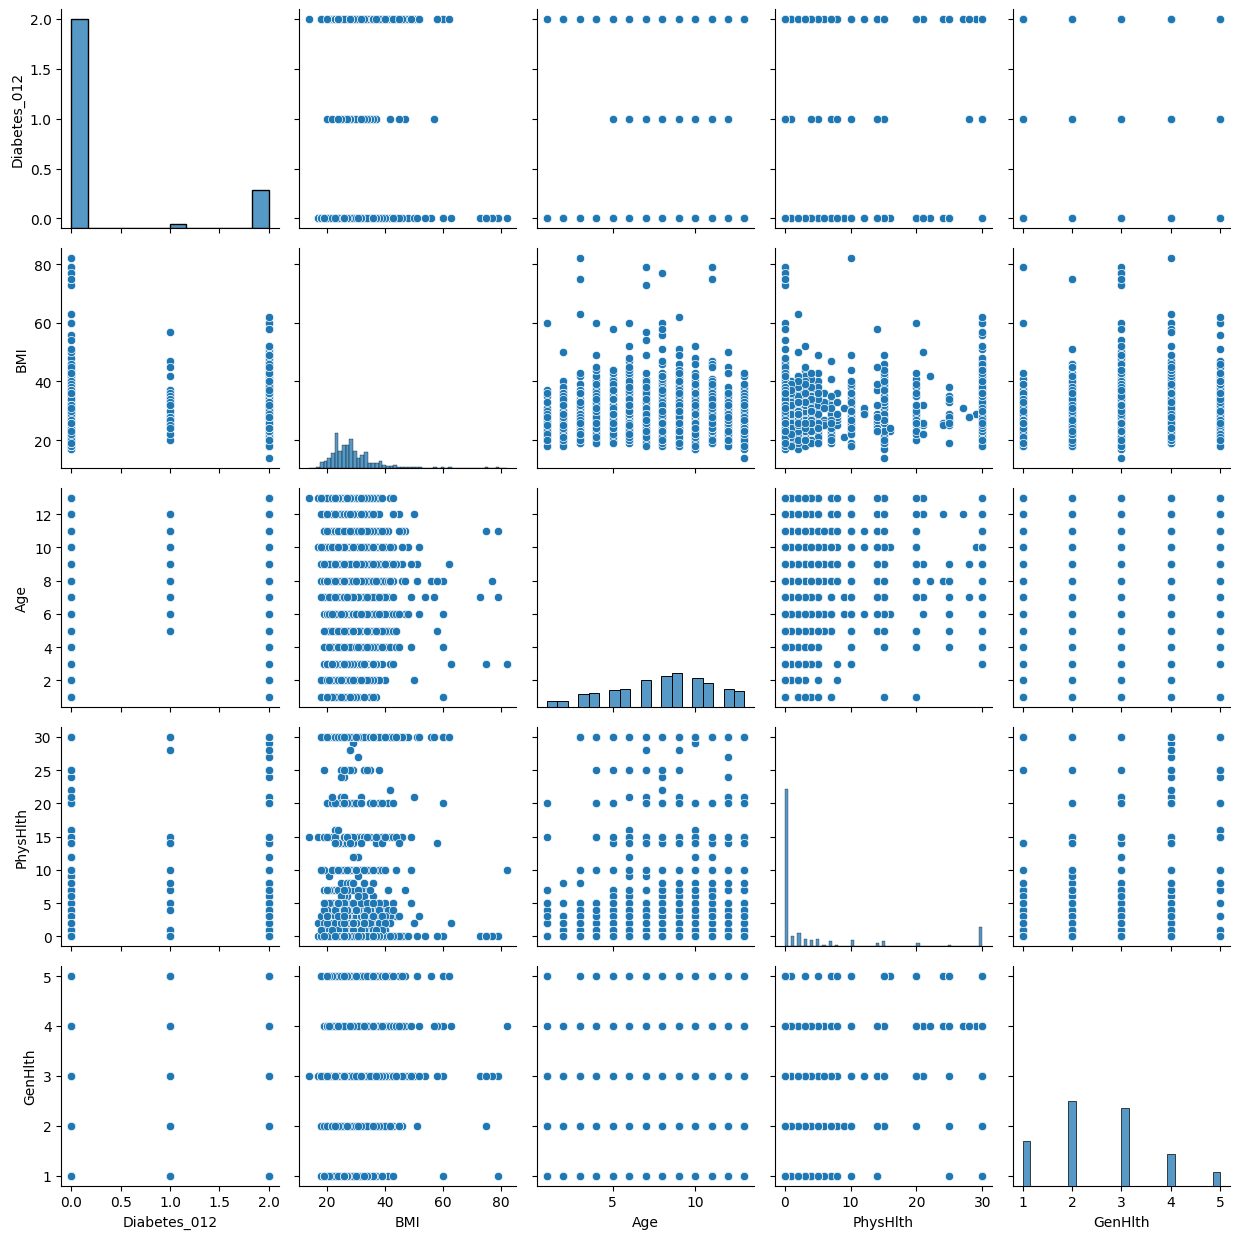

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_sample = df.sample(n=2000, random_state=1)

correlation_columns = ['Diabetes_012', 'BMI', 'Age', 'PhysHlth', 'GenHlth']

sns.pairplot(df_sample[correlation_columns])
plt.tight_layout()
plt.show()

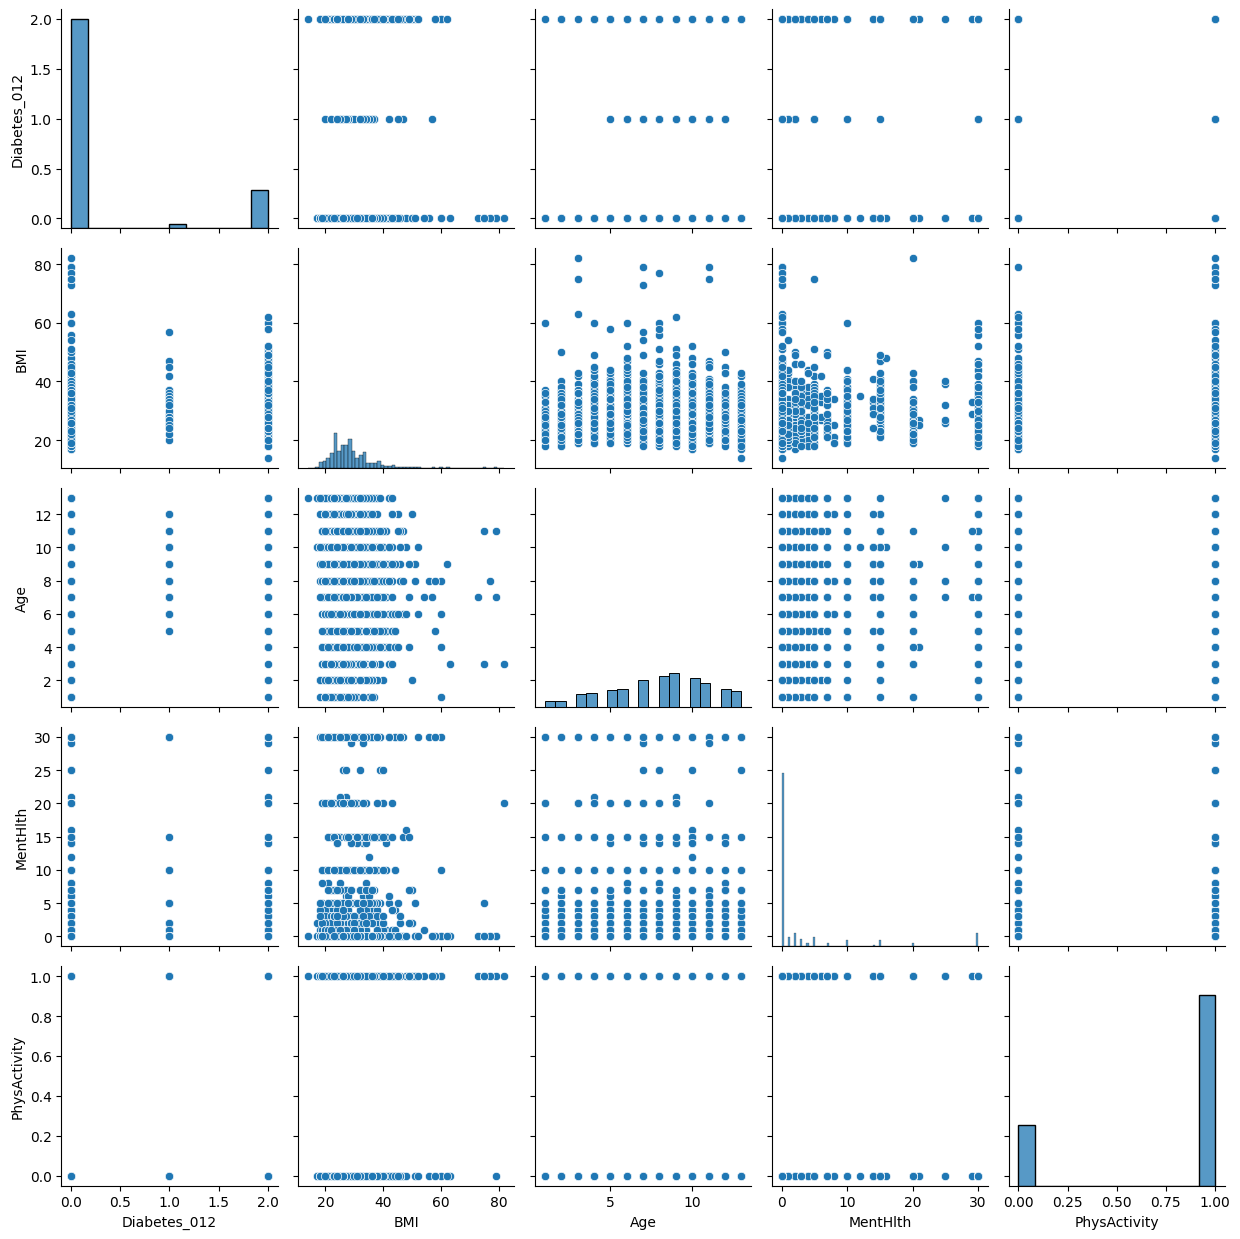

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

df_sample2 = df.sample(n=2000, random_state=1)

correlation_columns2 = ['Diabetes_012', 'BMI', 'Age', 'MentHlth', 'PhysActivity']

sns.pairplot(df_sample[correlation_columns2])
plt.tight_layout()
plt.show()

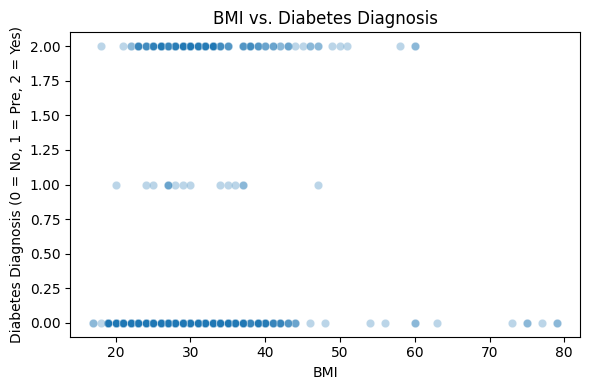

In [10]:
df_sample = df.sample(n=1000, random_state=1)

# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_sample, x='BMI', y='Diabetes_012', alpha=0.3)

plt.title("BMI vs. Diabetes Diagnosis")
plt.xlabel("BMI")
plt.ylabel("Diabetes Diagnosis (0 = No, 1 = Pre, 2 = Yes)")
plt.tight_layout()
plt.show()

In [11]:
correlation = df[['BMI', 'Diabetes_012']].corr().iloc[0, 1]
print(f"Correlation between BMI and Diabetes_012: {correlation:.3f}")

Correlation between BMI and Diabetes_012: 0.224


Correlation between Age and Diabetes Diagnosis: 0.185


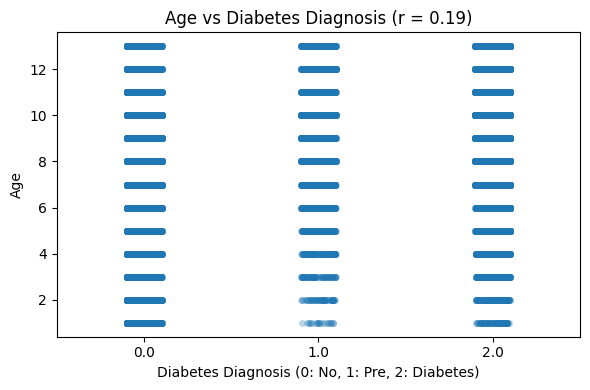

In [12]:
# age vs. diabetes

corr_age = df[['Age', 'Diabetes_012']].corr().iloc[0, 1]
print(f"Correlation between Age and Diabetes Diagnosis: {corr_age:.3f}")

# Plot
plt.figure(figsize=(6, 4))
sns.stripplot(data=df, x='Diabetes_012', y='Age', jitter=True, alpha=0.3)
plt.title(f"Age vs Diabetes Diagnosis (r = {corr_age:.2f})")
plt.xlabel("Diabetes Diagnosis (0: No, 1: Pre, 2: Diabetes)")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

Correlation between PhysHlth and Diabetes Diagnosis: 0.176


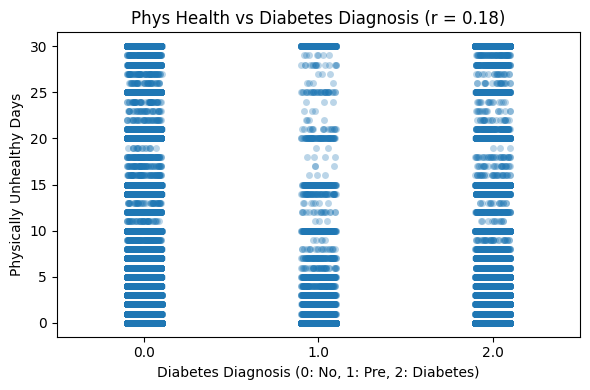

In [14]:
# physical health and diabetes

# Calculate correlation
corr_phys = df[['PhysHlth', 'Diabetes_012']].corr().iloc[0, 1]
print(f"Correlation between PhysHlth and Diabetes Diagnosis: {corr_phys:.3f}")

# Plot
plt.figure(figsize=(6, 4))
sns.stripplot(data=df, x='Diabetes_012', y='PhysHlth', jitter=True, alpha=0.3)
plt.title(f"Phys Health vs Diabetes Diagnosis (r = {corr_phys:.2f})")
plt.xlabel("Diabetes Diagnosis (0: No, 1: Pre, 2: Diabetes)")
plt.ylabel("Physically Unhealthy Days")
plt.tight_layout()
plt.show()

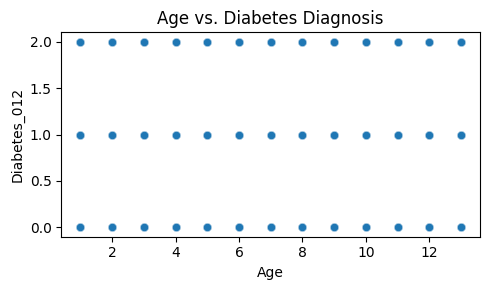

In [8]:
# correlations between pairs of variables


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))

# 1. BMI vs. Diabetes
sns.scatterplot(data=df, x='BMI', y='Diabetes_012', alpha=0.3)
plt.title("BMI vs. Diabetes Diagnosis")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))

# 2. Age vs. Diabetes
sns.scatterplot(data=df, x='Age', y='Diabetes_012', alpha=0.3)
plt.title("Age vs. Diabetes Diagnosis")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))

# 3. PhysHlth vs. Diabetes
sns.scatterplot(data=df, x='PhysHlth', y='Diabetes_012', alpha=0.3)
plt.title("Physically Unhealthy Days vs. Diabetes Diagnosis")
plt.tight_layout()
plt.show()


CONCLUSIONS:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!
    - The data is what I expect although the trends are not very clear. Since most columns are categorical, it's hard to visualize continous correlations. But there is a correlation between BMI and diabetes as we would expect. 


- Do you see any outliers?  (Data points that are far from the rest of the data).
    - Yes, BMI has some unusually high values above 60. Age and general health have some skewness suggesting outliers as well. 


- Are any data items highly correlated with each other, suggesting that they are redundant?
    - no 

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?
    - N/A

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)
    - Age and income could be confounding variables both affecting diabetes separate from other health indicators
    - I am very surprised and dissapointed that fasting blood glucose isn't in the dataset becuase diabetes is a blood sugar disorder. It would also be helpful to know if they have genetic daibetes or lifestyle induced diabetes (type 1 or 2).




DATASET 2: Heart Disease 

In [3]:
df_heart.select_dtypes(include='number').columns

Index(['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
       'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
       'Homocysteine Level'],
      dtype='object')

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df_heart.select_dtypes(include='number').columns

# Drop rows with missing values in those columns
df_heart_clean = df_heart[numeric_cols].dropna()

# Optional: sample for speed
df_sample = df_heart_clean.sample(n=1000, random_state=1)

# Pairplot
sns.pairplot(df_sample, corner=True, diag_kind='kde')
plt.suptitle("Pairplot of Heart Health Numeric Features", y=1.02)
plt.tight_layout()
plt.show()

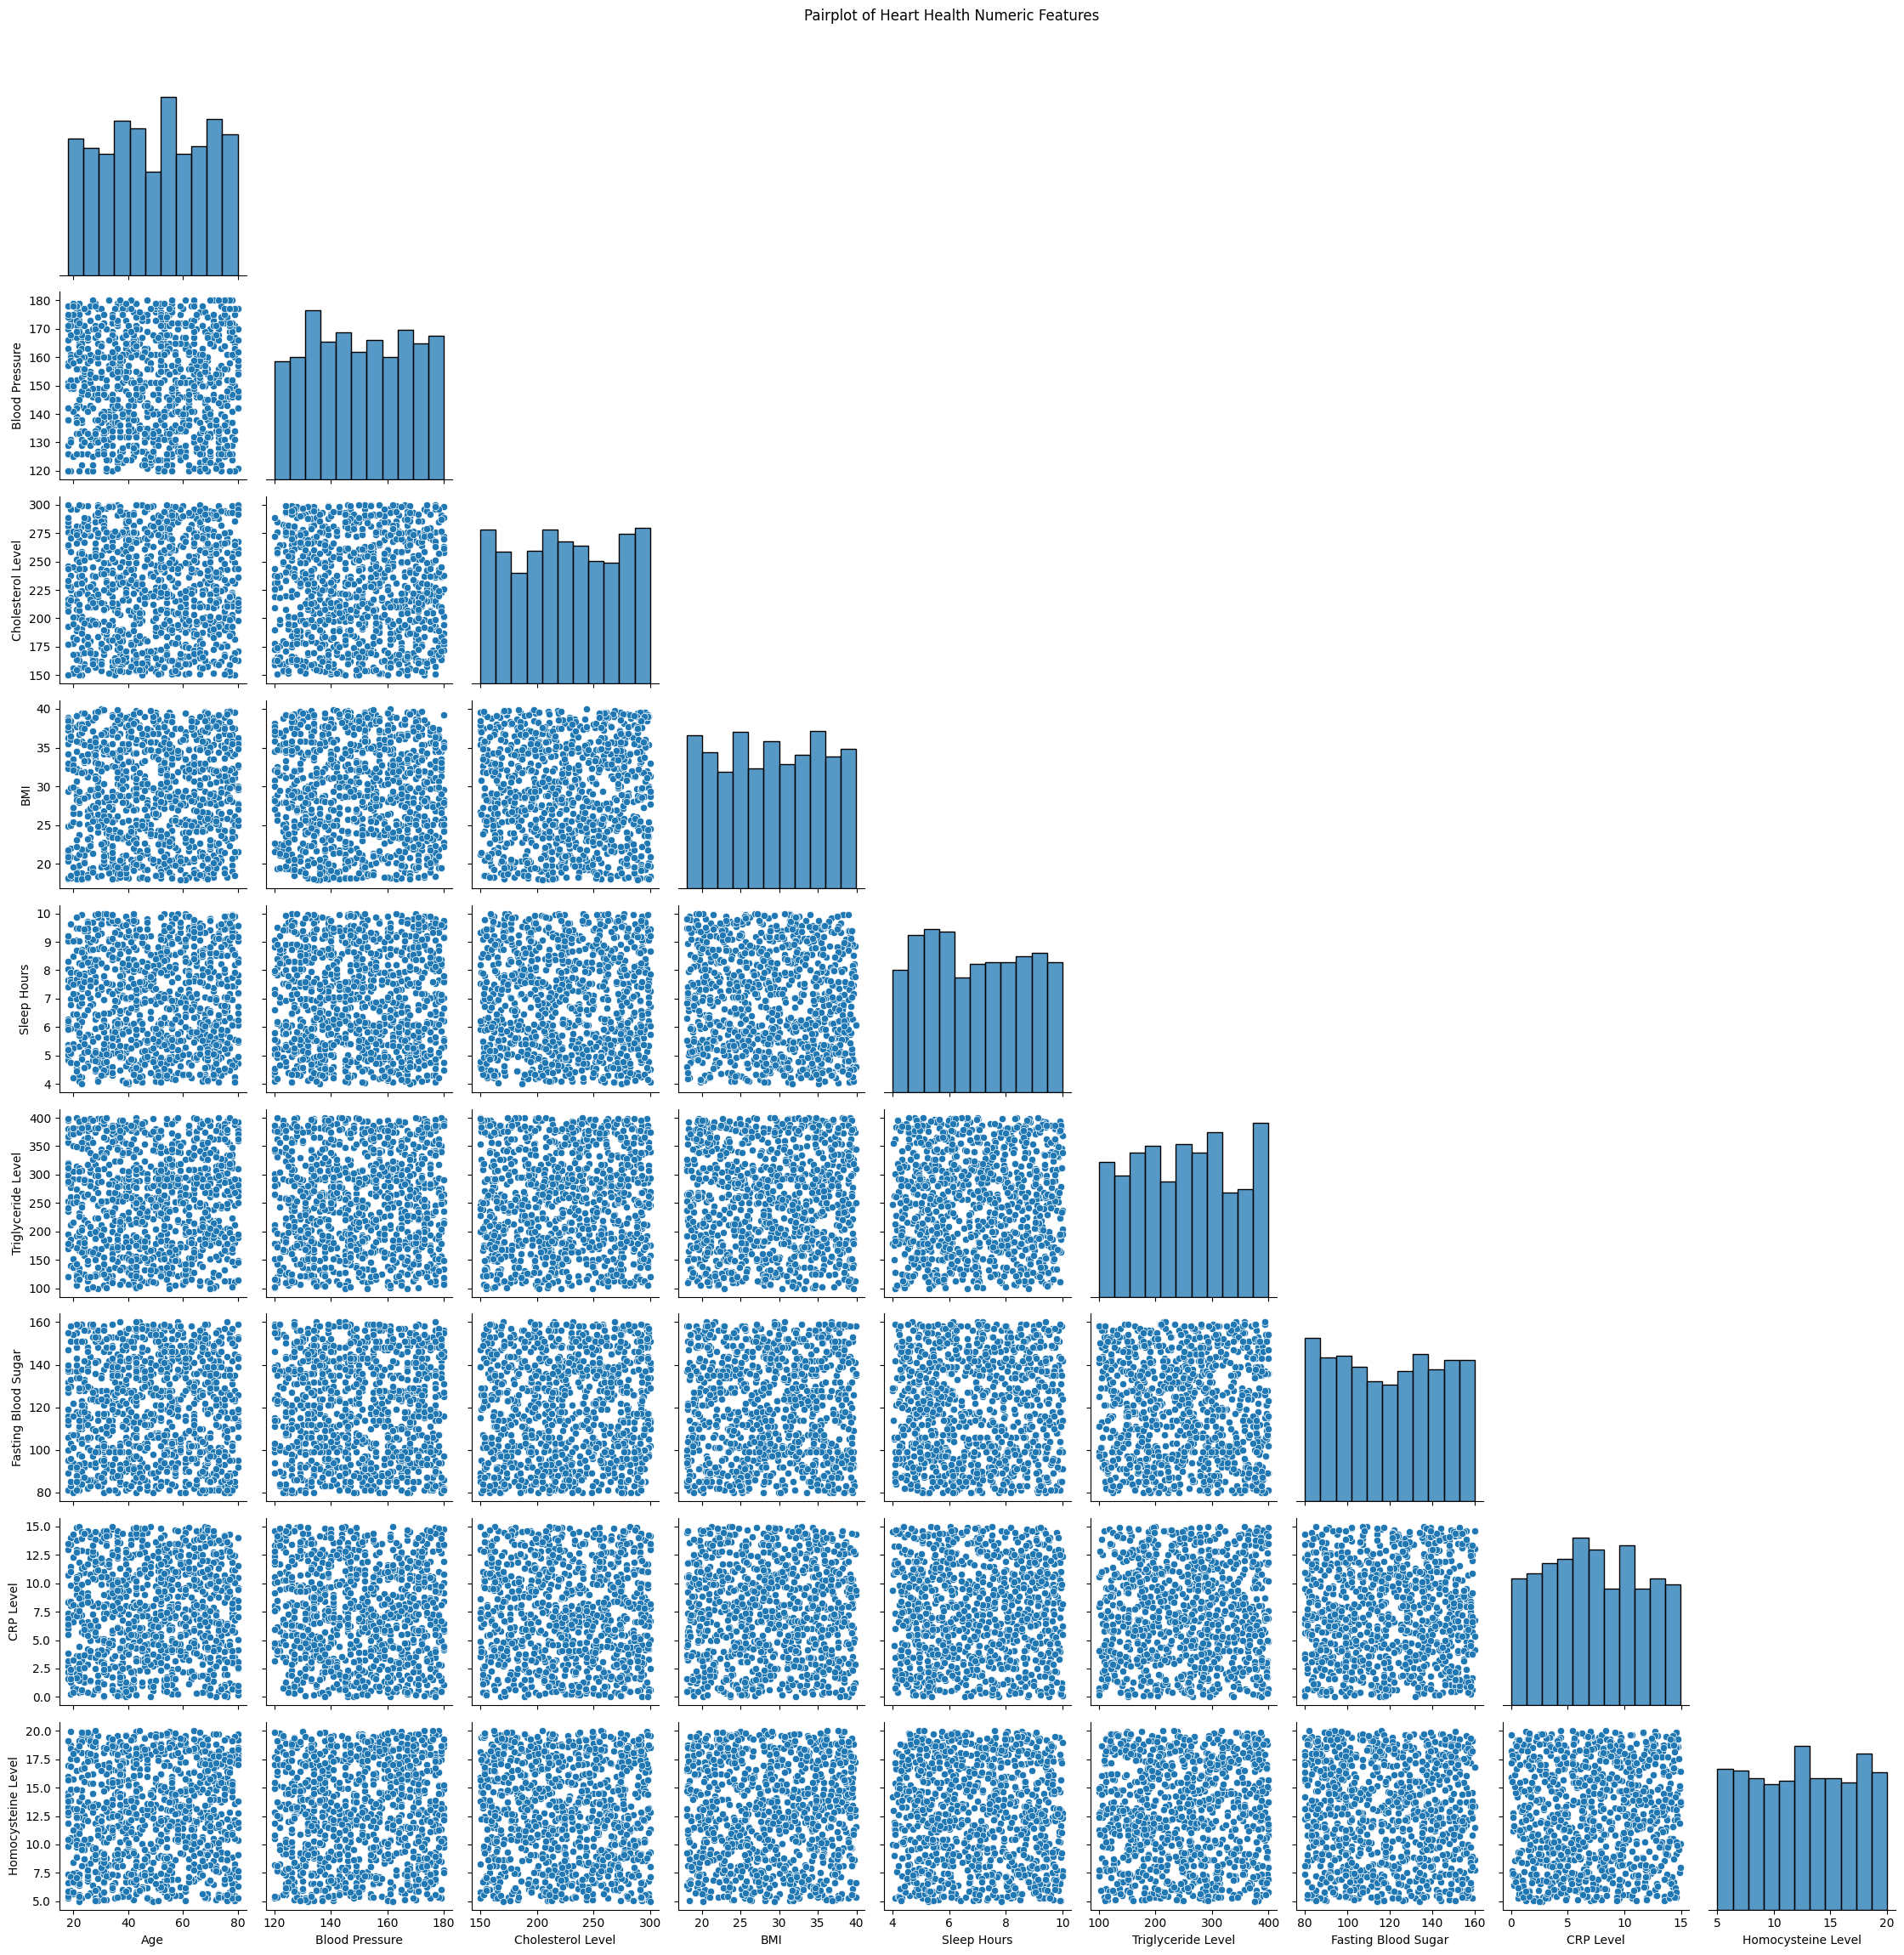

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df_heart.select_dtypes(include='number').columns

# Drop rows with missing values in those columns
df_heart_clean = df_heart[numeric_cols].dropna()

# Optional: sample for speed
df_sample = df_heart_clean.sample(n=1000, random_state=1)

# Pairplot
sns.pairplot(df_sample, corner=True)
plt.suptitle("Pairplot of Heart Health Numeric Features", y=1.02)
plt.tight_layout()
plt.show()

In [5]:
sns.scatterplot(data=df_heart, x='BMI', y='Triglyceride Level')
plt.show()

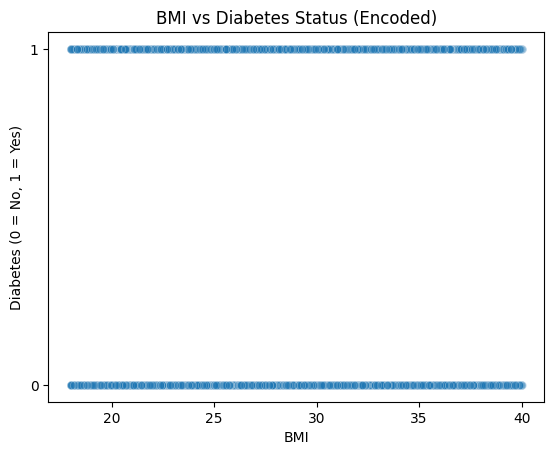

In [9]:
df_heart['Diabetes_Encoded'] = df_heart['Diabetes'].map({'No': 0, 'Yes': 1})
df_plot = df_heart[['BMI', 'Diabetes_Encoded']].dropna()

sns.scatterplot(data=df_plot, x='BMI', y='Diabetes_Encoded', alpha=0.3)
plt.title("BMI vs Diabetes Status (Encoded)")
plt.xlabel("BMI")
plt.ylabel("Diabetes (0 = No, 1 = Yes)")
plt.yticks([0, 1])
plt.show()

Conclusions Dataset 2:


- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!
    - This dataset appears to be artificially generated becuase there are no correlations between variables and the data is uniformly distributed. 


- Do you see any outliers?  (Data points that are far from the rest of the data).
    - no 


- Are any data items highly correlated with each other, suggesting that they are redundant?
    - no 


- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?
    - N/A

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)
    - N/A


DATASET 3: Colorectal Cancer Global Dataset

In [15]:
# makeing a dataframe with just the columns related to diabetes

selected_columns = [
    'Country',
    'Age',
    'Gender',
    'Smoking_History',
    'Alcohol_Consumption',
    'Obesity_BMI',
    'Diet_Risk',
    'Physical_Activity',
    'Diabetes',
    'Inflammatory_Bowel_Disease',
    'Urban_or_Rural',
    'Economic_Classification',
    'Healthcare_Access',
    'Insurance_Status'
]

df_cc_diabetes = df_cc[selected_columns].copy()
df_cc_diabetes.head

<bound method NDFrame.head of        Country  Age Gender Smoking_History Alcohol_Consumption Obesity_BMI  \
0           UK   77      M              No                 Yes  Overweight   
1           UK   59      M              No                  No  Overweight   
2        Japan   66      M             Yes                  No      Normal   
3          USA   83      M              No                  No       Obese   
4       France   66      M             Yes                  No      Normal   
...        ...  ...    ...             ...                 ...         ...   
167492     USA   69      M             Yes                  No  Overweight   
167493     USA   79      F             Yes                 Yes  Overweight   
167494     USA   74      M             Yes                 Yes      Normal   
167495      UK   68      F             Yes                 Yes      Normal   
167496  France   79      F              No                  No       Obese   

       Diet_Risk Physical_Activit

In [17]:
# Automatically detect categorical columns (object or category types)
cat_cols = df_cc_diabetes.select_dtypes(include='object').columns

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_cc_diabetes, columns=cat_cols, drop_first=True)

# View the result
df_encoded.head()

Age  Country_Brazil  Country_Canada  Country_China  Country_France  \
0   77           False           False          False           False   
1   59           False           False          False           False   
2   66           False           False          False           False   
3   83           False           False          False           False   
4   66           False           False          False            True   

   Country_Germany  Country_India  Country_Italy  Country_Japan  \
0            False          False          False          False   
1            False          False          False          False   
2            False          False          False           True   
3            False          False          False          False   
4            False          False          False          False   

   Country_New Zealand  ...  Diet_Risk_Moderate  Physical_Activity_Low  \
0                False  ...               False                   True   
1                False  ...                True                   True   
2                False  ...               False                   True   
3                False  ...               False                   True   
4                False  ...               False                  False   

   Physical_Activity_Moderate  Diabetes_Yes  Inflammatory_Bowel_Disease_Yes  \
0                       False         False                           False   
1                       False         False                           False   
2                       False         False                            True   
3                       False         False                           False   
4                        True         False                            True   

   Urban_or_Rural_Urban  Economic_Classification_Developing  \
0                  True                               False   
1                  True                                True   
2                  True                               False   
3                  True                               False   
4                  True                                True   

   Healthcare_Access_Low  Healthcare_Access_Moderate  \
0                  False                        True   
1                  False                       False   
2                  False                        True   
3                  False                        True   
4                  False                       False   

   Insurance_Status_Uninsured  
0                       False  
1                        True  
2                        True  
3                       False  
4                       False  

[5 rows x 32 columns]

In [18]:
df_encoded.corr()

Age  Country_Brazil  \
Age                                 1.000000e+00        0.003501   
Country_Brazil                      3.501161e-03        1.000000   
Country_Canada                      3.089931e-03       -0.060654   
Country_China                       1.554788e-03       -0.087950   
Country_France                      1.999530e-03       -0.066286   
Country_Germany                    -2.691918e-03       -0.072297   
Country_India                      -1.722860e-04       -0.066465   
Country_Italy                       3.210472e-07       -0.060567   
Country_Japan                      -1.265293e-03       -0.077470   
Country_New Zealand                -1.467342e-03       -0.037106   
Country_Nigeria                     2.541467e-03       -0.037865   
Country_Pakistan                   -2.701172e-03       -0.037854   
Country_South Africa               -2.835539e-03       -0.045925   
Country_South Korea                 2.376714e-03       -0.078024   
Country_UK                         -1.886662e-03       -0.072354   
Country_USA                        -3.873504e-04       -0.110103   
Gender_M                           -6.579771e-04        0.004999   
Smoking_History_Yes                -1.982142e-03       -0.000090   
Alcohol_Consumption_Yes             7.283687e-04       -0.001892   
Obesity_BMI_Obese                  -1.484427e-03        0.003411   
Obesity_BMI_Overweight             -2.544300e-04        0.001156   
Diet_Risk_Low                      -4.062281e-03        0.002333   
Diet_Risk_Moderate                  3.836281e-03       -0.000995   
Physical_Activity_Low               4.183802e-03        0.002455   
Physical_Activity_Moderate         -8.004651e-03        0.000149   
Diabetes_Yes                       -2.681556e-03        0.001155   
Inflammatory_Bowel_Disease_Yes      3.558067e-03       -0.000425   
Urban_or_Rural_Urban               -1.719552e-03        0.000855   
Economic_Classification_Developing -4.145955e-03        0.000821   
Healthcare_Access_Low              -1.885849e-03        0.002368   
Healthcare_Access_Moderate          7.070970e-04       -0.004032   
Insurance_Status_Uninsured         -4.589742e-05       -0.000324   

                                    Country_Canada  Country_China  \
Age                                       0.003090       0.001555   
Country_Brazil                           -0.060654      -0.087950   
Country_Canada                            1.000000      -0.080589   
Country_China                            -0.080589       1.000000   
Country_France                           -0.060738      -0.088071   
Country_Germany                          -0.066246      -0.096058   
Country_India                            -0.060903      -0.088310   
Country_Italy                            -0.055498      -0.080473   
Country_Japan                            -0.070987      -0.102932   
Country_New Zealand                      -0.034001      -0.049301   
Country_Nigeria                          -0.034696      -0.050309   
Country_Pakistan                         -0.034686      -0.050295   
Country_South Africa                     -0.042081      -0.061018   
Country_South Korea                      -0.071494      -0.103668   
Country_UK                               -0.066299      -0.096134   
Country_USA                              -0.100889      -0.146290   
Gender_M                                  0.002496       0.002324   
Smoking_History_Yes                      -0.002312       0.000860   
Alcohol_Consumption_Yes                  -0.002952       0.001254   
Obesity_BMI_Obese                         0.000473      -0.003066   
Obesity_BMI_Overweight                   -0.000300       0.000052   
Diet_Risk_Low                             0.002214      -0.000263   
Diet_Risk_Moderate                       -0.001174       0.000807   
Physical_Activity_Low                    -0.001945       0.002095   
Physical_Activity_Moderate                0.001156      -0.001490   
Diabet

In [21]:
# Create a new DataFrame with encoded values
df_encoded_bmi_diabetes = df_cc.copy()

# Encode Diabetes and Obesity_BMI columns into 0, 1, 2
df_encoded_bmi_diabetes['Diabetes_Encoded'] = df_cc['Diabetes'].map({'No': 0, 'Yes': 1})
df_encoded_bmi_diabetes['Obesity_Encoded'] = df_cc['Obesity_BMI'].map({'Normal': 0, 'Overweight': 1, 'Obese': 2})

# Optionally: drop the original columns if you only want the encoded versions
# df_encoded = df_encoded.drop(['Diabetes', 'Obesity_BMI'], axis=1)

df_encoded_bmi_diabetes.head()

Patient_ID Country  Age Gender Cancer_Stage  Tumor_Size_mm Family_History  \
0           1      UK   77      M    Localized             69             No   
1           2      UK   59      M    Localized             33             No   
2           3   Japan   66      M     Regional             17             No   
3           4     USA   83      M     Regional             14             No   
4           5  France   66      M    Localized             34             No   

  Smoking_History Alcohol_Consumption Obesity_BMI  ... Healthcare_Costs  \
0              No                 Yes  Overweight  ...            54413   
1              No                  No  Overweight  ...            76553   
2             Yes                  No      Normal  ...            62805   
3              No                  No       Obese  ...            89393   
4             Yes                  No      Normal  ...            66425   

  Incidence_Rate_per_100K Mortality_Rate_per_100K Urban_or_Rural  \
0                      50                       5          Urban   
1                      37                      25          Urban   
2                      54                      27          Urban   
3                      45                      11          Urban   
4                      15                      27          Urban   

  Economic_Classification Healthcare_Access Insurance_Status  \
0               Developed          Moderate          Insured   
1              Developing              High        Uninsured   
2               Developed          Moderate        Uninsured   
3               Developed          Moderate          Insured   
4              Developing              High          Insured   

  Survival_Prediction Diabetes_Encoded Obesity_Encoded  
0                 Yes                0               1  
1                 Yes                0               1  
2                  No                0               0  
3                 Yes                0               2  
4                 Yes                0               0  

[5 rows x 30 columns]

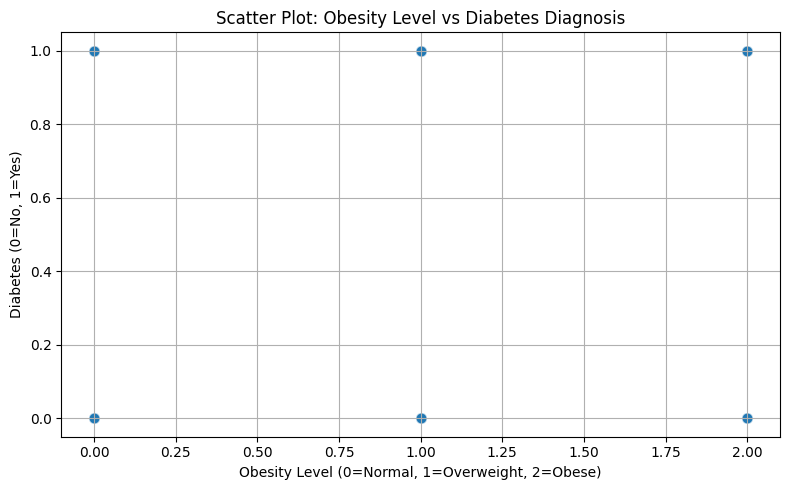

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing values in the relevant columns
df_plot = df_encoded_bmi_diabetes[['Diabetes_Encoded', 'Obesity_Encoded']].dropna()

# Create the scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_plot,
    x='Obesity_Encoded',
    y='Diabetes_Encoded',
    alpha=0.4,
    s=60
)

plt.title('Scatter Plot: Obesity Level vs Diabetes Diagnosis')
plt.xlabel('Obesity Level (0=Normal, 1=Overweight, 2=Obese)')
plt.ylabel('Diabetes (0=No, 1=Yes)')
plt.grid(True)
plt.tight_layout()
plt.show()

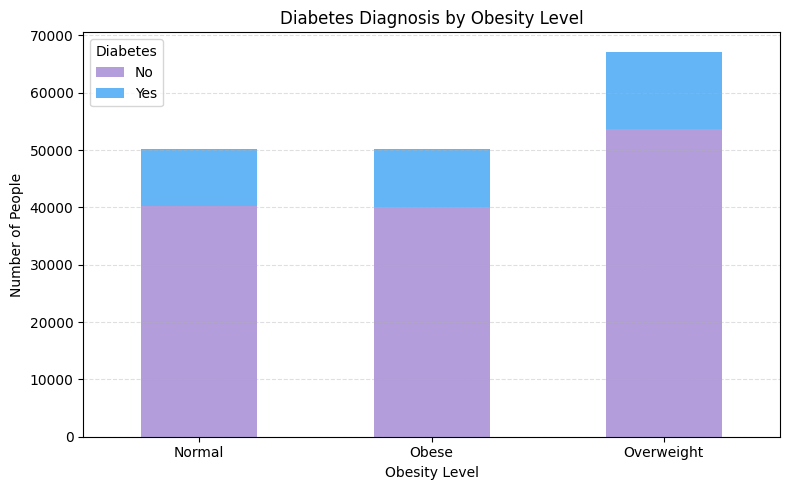

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Map encoded obesity levels to readable labels
obesity_map = {0: 'Normal', 1: 'Overweight', 2: 'Obese'}
df_plot = df_encoded_bmi_diabetes[['Obesity_Encoded', 'Diabetes_Encoded']].dropna()
df_plot['Obesity_Label'] = df_plot['Obesity_Encoded'].map(obesity_map)

# Create contingency table
bar_data = pd.crosstab(df_plot['Obesity_Label'], df_plot['Diabetes_Encoded'])

# Plot stacked bar chart
colors = ['#b39ddb', '#64b5f6']  # light purple and light blue
bar_data.plot(kind='bar', stacked=True, color=colors, figsize=(8, 5))

plt.title('Diabetes Diagnosis by Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Number of People')
plt.legend(title='Diabetes', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

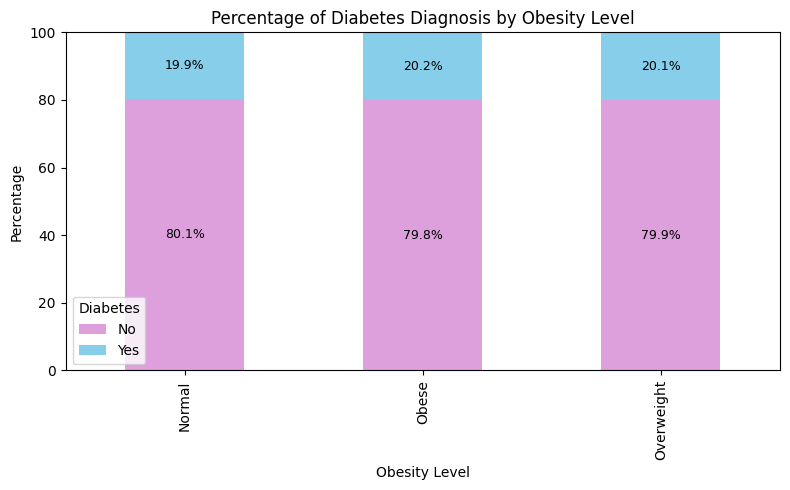

In [27]:

# Calculate proportion table
prop_df = (
    df_encoded_bmi_diabetes
    .groupby(['Obesity_BMI', 'Diabetes_Encoded'])
    .size()
    .unstack(fill_value=0)
)

# Convert counts to percentages
prop_percent = prop_df.div(prop_df.sum(axis=1), axis=0) * 100

# Plot
colors = ['plum', 'skyblue']  # 0 = No, 1 = Yes
prop_percent.plot(kind='bar', stacked=True, color=colors, figsize=(8, 5))

# Add labels on top of bars
for i, (index, row) in enumerate(prop_percent.iterrows()):
    y_offset = 0
    for j, value in enumerate(row):
        plt.text(
            i,
            y_offset + value / 2,
            f'{value:.1f}%',
            ha='center',
            va='center',
            fontsize=9
        )
        y_offset += value

plt.title('Percentage of Diabetes Diagnosis by Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Percentage')
plt.legend(title='Diabetes', labels=['No', 'Yes'])
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

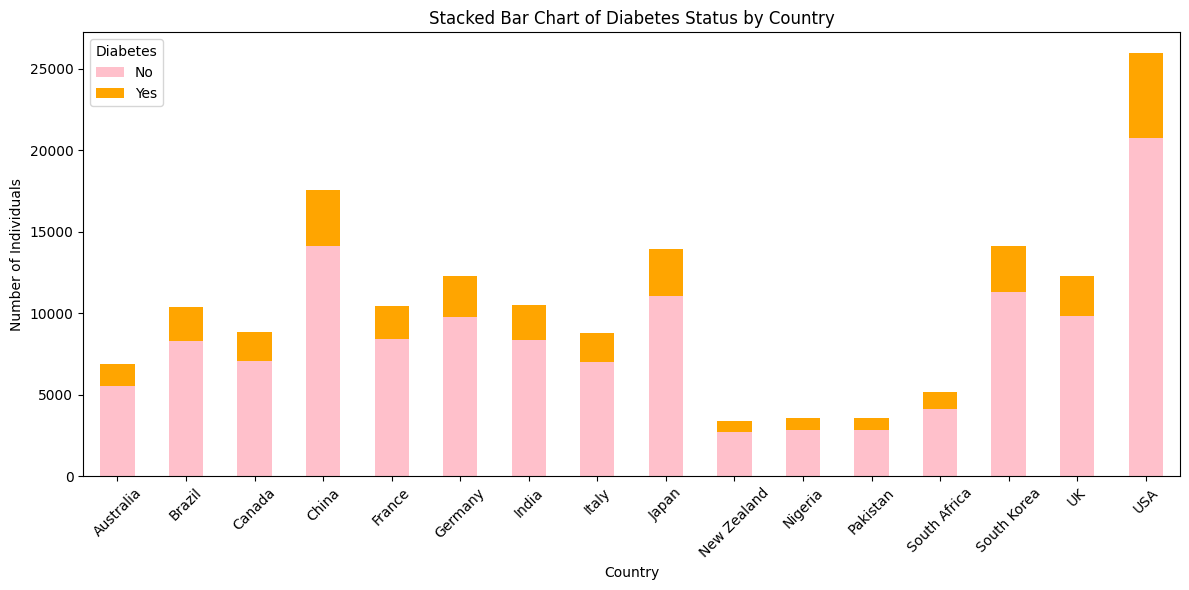

In [12]:
import matplotlib.pyplot as plt

# Create counts by country and diabetes status
stacked_counts = df_cc.groupby(['Country', 'Diabetes']).size().unstack(fill_value=0)

# Plot stacked bar chart
stacked_counts.plot(
    kind='bar',
    stacked=True,
    color=['pink', 'orange'],  # order should match Diabetes column order
    figsize=(12, 6)
)

# Formatting
plt.title('Stacked Bar Chart of Diabetes Status by Country')
plt.xlabel('Country')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.legend(title='Diabetes')
plt.tight_layout()
plt.show()

CONCLUSIONS Dataset 3:

Since almost all of the useful columns in this dataset are categorical, scatterplots are not an informative visualization tool. I encoded the categorical columns BMI and diabetes to 0,1,2 format and visualized them with bar graphs instead. 

Visualizations from week 4, such as histograms and bar graphs, are better suited for this type of data.  

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

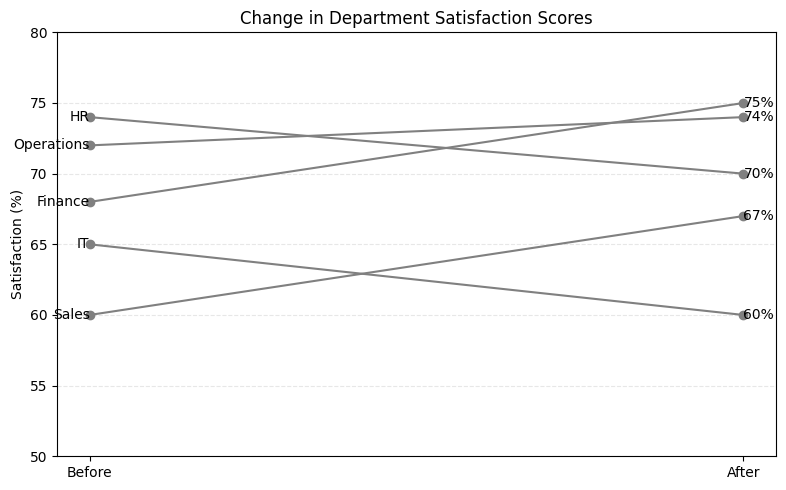

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Simulated data
data = {
    'Category': ['Finance', 'HR', 'Sales', 'IT', 'Operations'],
    'Before': [68, 74, 60, 65, 72],
    'After':  [75, 70, 67, 60, 74]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(8, 5))

for _, row in df.iterrows():
    plt.plot(['Before', 'After'], [row['Before'], row['After']], marker='o', color='gray')
    plt.text('Before', row['Before'], f"{row['Category']}", ha='right', va='center')
    plt.text('After', row['After'], f"{row['After']}%", ha='left', va='center')

# Format
plt.title("Change in Department Satisfaction Scores")
plt.ylabel("Satisfaction (%)")
plt.xticks(['Before', 'After'])
plt.ylim(50, 80)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()